Notebook where to plot the curves and display the performance of all models in 
a chosen folder. It is also where to conduct the performance analysis about the
models database.

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_1samp

from contrastive.utils.models_database import import_bdd

In [118]:
import os

def last_part(path):
    return os.sep.join(path.rsplit(r"/")[-2:])

## Use the different-n database

In [166]:
database_path = "/neurospin/dico/data/deep_folding/papers/miccai2023/Output/contrastive/summary/bdd_HCP-UkBioBank_different-n_evaluation-ACCpatterns-1.csv"
bdd = pd.read_csv(database_path, index_col=0)
bdd.sort_values(by='auc', ascending=False, inplace=True)
bdd.loc[bdd.dataset_name.str.contains("UkBioBank"), "dataset_name"] = "UKBioBank"
bdd.loc[bdd.dataset_name.str.contains("ACCpatterns"), "dataset_name"] = "ACC-1"
bdd.loc[bdd.dataset_name.str.contains("HCP"), "dataset_name"] = "HCP-2"

In [167]:
bdd = bdd.copy()
bdd["model_name"] = "=0"
bdd["model_name"] = bdd.model_path.apply(lambda x: x.split(sep='/')[-2])
bdd.loc[bdd.dataset_name=="ACC","model_name"] = "cingulate_ACCpatterns_0_n=171"
bdd.loc[bdd.model_name=="all","model_name"] = "cingulate_HCP_n=1101"
bdd.loc[bdd.model_path.str.contains("n=1114"),"model_name"] = "cingulate_UkBioBank_n=1101"
bdd["n"] = -1
bdd["n"] = bdd.model_name.apply(lambda x: int(x.split(sep='=')[-1]))
bdd["n"] = bdd.apply(lambda x: x["nb_subjects"] if x["nb_subjects"]>=0 else x["n"], axis=1)
bdd["short_model_path"] = bdd.model_path.apply(last_part)
bdd[["auc", "nb_subjects", "n", "dataset_name", "model_name", "short_model_path"]][bdd.short_model_path.str.contains("5000")].sort_values(by='n')

,auc,nb_subjects,n,dataset_name,model_name,short_model_path
56,0.789371,5000,5000,UKBioBank,ukbiobank-n=5000,ukbiobank-n=5000/21-51-48_3
57,0.780615,5000,5000,UKBioBank,ukbiobank-n=5000,ukbiobank-n=5000/21-51-48_2
60,0.764771,5000,5000,UKBioBank,ukbiobank-n=5000,ukbiobank-n=5000/21-51-48_1
59,0.719970,5000,5000,UKBioBank,ukbiobank-n=5000,ukbiobank-n=5000/21-51-48_0
58,0.678907,5000,5000,UKBioBank,ukbiobank-n=5000,ukbiobank-n=5000/21-51-48_4


(0.5, 0.8)

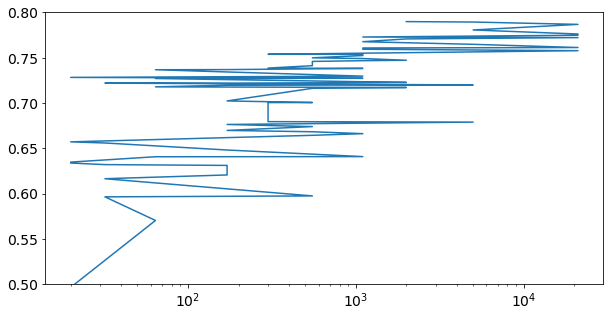

In [168]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(bdd.n, bdd.auc)
ax.set_xscale("log")
ax.set_ylim([0.5,0.8])

(0.5, 0.8)

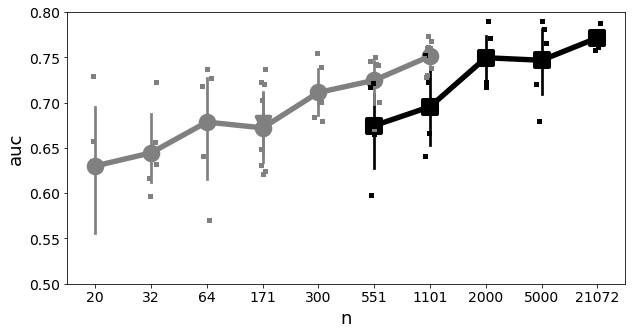

In [174]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.pointplot(data=bdd, x=bdd.n, y="auc", palette=['black', 'black', 'grey'],markers=['^', 's','o'], hue='dataset_name', linestyles=['-','-','-'], scale=2,ax=ax)
sns.stripplot(data=bdd, x=bdd.n, y="auc", marker='s', palette=['black', 'grey', 'grey'], hue='dataset_name', jitter=1, ax=ax)
ax.legend([],[], frameon=False)
ax.set_ylim([0.5,0.8])
# ax.set_xscale('log')

In [170]:
database_path = "/neurospin/dico/data/deep_folding/papers/ipmi2023/models/contrastive/summary/bdd_HCP-half-2-different-n_evaluation-ACCpatterns-1.csv"

In [14]:
bdd_n_site = import_bdd(database_path, verbose=True)
bdd_n_site.sort_values(by='auc', inplace=True)
print(bdd_n_site[bdd_n_site.model_path.str.contains("training-on-hcp-2-n=551")])
bdd_n_site = bdd_n_site[bdd_n_site.exclude == 'False']

bdd_n_site["model_name"] = bdd_n_site.model_path.apply(lambda x: x.split(sep='/')[-2])
print(bdd_n_site[bdd_n_site["model_name"]=="training-on-hcp-2-n=551"])
bdd_n_site.head()

path /neurospin/dico/data/deep_folding/papers/ipmi2023/models/contrastive/summary/bdd_HCP-half-2-different-n_evaluation-ACCpatterns-1.csv
0 have been removed for bad learning
                                           model_path       auc   auc_std  \
29  /neurospin/dico/data/deep_folding/papers/ipmi2...  0.668262  0.002930   
26  /neurospin/dico/data/deep_folding/papers/ipmi2...  0.741189  0.002659   
25  /neurospin/dico/data/deep_folding/papers/ipmi2...  0.741980  0.003783   
27  /neurospin/dico/data/deep_folding/papers/ipmi2...  0.745901  0.003135   
28  /neurospin/dico/data/deep_folding/papers/ipmi2...  0.749881  0.003085   

    accuracy  accuracy_std          dataset_name   model  n_max  with_labels  \
29  0.662199      0.008900  cingulate_HCP_half_2  SimCLR   1080        False   
26  0.691532      0.006607  cingulate_HCP_half_2  SimCLR   1080        False   
25  0.690924      0.008623  cingulate_HCP_half_2  SimCLR   1080        False   
27  0.699181      0.006776  cingulate_HCP_

,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,model,n_max,with_labels,train_val_csv_file,exclude,model_name
12,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.496505,0.035252,0.551228,0.010062,cingulate_HCP_half_2,SimCLR_supervised,1080,True,/neurospin/dico/data/deep_folding/papers/ipmi2...,False,training-on-hcp-2-n=20
32,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.570375,0.015530,0.588257,0.012994,cingulate_HCP_half_2,SimCLR_supervised,1080,True,/neurospin/dico/data/deep_folding/papers/ipmi2...,False,training-on-hcp-2-n=64
23,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.596417,0.045014,0.584515,0.010981,cingulate_HCP_half_2,SimCLR_supervised,1080,True,/neurospin/dico/data/deep_folding/papers/ipmi2...,False,training-on-hcp-2-n=32
20,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.616425,0.007069,0.616936,0.010266,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=32
6,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.620586,0.010187,0.625216,0.013397,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=171


In [15]:
bdd_n_site[bdd_n_site.model_name=='training-on-hcp-2-n=551']

,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,model,n_max,with_labels,train_val_csv_file,exclude,model_name
29,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.668262,0.002930,0.662199,0.008900,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551
26,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.741189,0.002659,0.691532,0.006607,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551
25,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.741980,0.003783,0.690924,0.008623,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551
27,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.745901,0.003135,0.699181,0.006776,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551
28,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.749881,0.003085,0.699977,0.010915,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551


In [16]:
bdd_n = bdd_n_site[(bdd_n_site["dataset_name"] != "cingulate_ACCpatterns_0")].copy(deep=True)
print(bdd_n[bdd_n.model_name=='training-on-hcp-2-n=551'])
bdd_n["n"] = bdd_n.model_name.apply(lambda x: int(float(x.split(sep='=')[-1])))
# bdd_n = bdd_n[bdd_n["n"]<=551]
bdd_n['id'] = True
bdd_n[bdd_n.model_name=='training-on-hcp-2-n=551']

                                           model_path       auc   auc_std  \
29  /neurospin/dico/data/deep_folding/papers/ipmi2...  0.668262  0.002930   
26  /neurospin/dico/data/deep_folding/papers/ipmi2...  0.741189  0.002659   
25  /neurospin/dico/data/deep_folding/papers/ipmi2...  0.741980  0.003783   
27  /neurospin/dico/data/deep_folding/papers/ipmi2...  0.745901  0.003135   
28  /neurospin/dico/data/deep_folding/papers/ipmi2...  0.749881  0.003085   

    accuracy  accuracy_std          dataset_name   model  n_max  with_labels  \
29  0.662199      0.008900  cingulate_HCP_half_2  SimCLR   1080        False   
26  0.691532      0.006607  cingulate_HCP_half_2  SimCLR   1080        False   
25  0.690924      0.008623  cingulate_HCP_half_2  SimCLR   1080        False   
27  0.699181      0.006776  cingulate_HCP_half_2  SimCLR   1080        False   
28  0.699977      0.010915  cingulate_HCP_half_2  SimCLR   1080        False   

   train_val_csv_file exclude               model_name  

,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,model,n_max,with_labels,train_val_csv_file,exclude,model_name,n,id
29,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.668262,0.002930,0.662199,0.008900,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551,551,True
26,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.741189,0.002659,0.691532,0.006607,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551,551,True
25,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.741980,0.003783,0.690924,0.008623,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551,551,True
27,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.745901,0.003135,0.699181,0.006776,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551,551,True
28,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.749881,0.003085,0.699977,0.010915,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551,551,True


In [17]:
bdd_n[bdd_n.model_name=="training-on-hcp-2-n=551"]

,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,model,n_max,with_labels,train_val_csv_file,exclude,model_name,n,id
29,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.668262,0.002930,0.662199,0.008900,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551,551,True
26,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.741189,0.002659,0.691532,0.006607,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551,551,True
25,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.741980,0.003783,0.690924,0.008623,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551,551,True
27,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.745901,0.003135,0.699181,0.006776,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551,551,True
28,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.749881,0.003085,0.699977,0.010915,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=551,551,True


(0.5, 0.8)

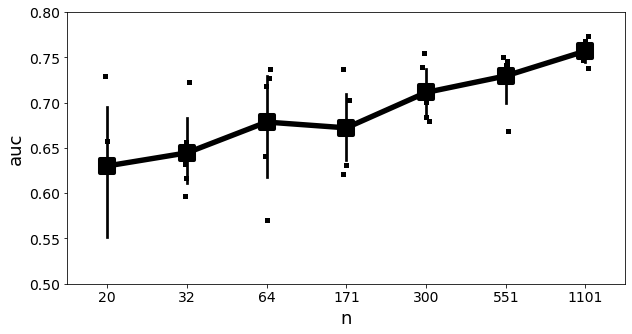

In [18]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 
f, axs = plt.subplots(1, 1, figsize=(10, 5))
sns.pointplot(data=bdd_n, x=bdd_n.n, y="auc", palette=['black'], hue='id', markers='s', linestyles=['-'], scale=2,ax=axs)
sns.stripplot(data=bdd_n, x=bdd_n.n, y="auc", marker='s', palette=['black'], jitter=.05, ax=axs)
axs.legend([],[], frameon=False)
axs.set_ylim([0.5,0.8])

In [19]:
bdd.head()

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,batch_size,checkerboard_size,dataset_name,depth_decoder,...,sigma_labels,temperature,temperature_initial,temperature_supervised,train_val_csv_file,weight_decay,with_labels,exclude,model_name,n
10,/neurospin/dico/data/deep_folding/papers/micca...,0.700531,0.005214,0.682737,0.008947,convnet,16,4,cingulate_HCP_half_2,3,...,2.0,0.1,0.1,0.3,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.00005,True,False,cingulate_HCP_n=551,551
5,/neurospin/dico/data/deep_folding/papers/micca...,0.789846,0.003747,0.718620,0.005355,convnet,16,4,cingulate_UkBioBank_n=1114,3,...,2.0,0.1,0.1,0.3,/neurospin/dico/jchavas/Runs/52_ukbiobank/Inpu...,0.00005,True,False,cingulate_UkBioBank_n=1101,1101
21,/neurospin/dico/data/deep_folding/papers/micca...,0.664329,0.003167,0.659018,0.006853,convnet,16,4,cingulate_UkBioBank_n=1114,3,...,2.0,0.1,0.1,0.3,/neurospin/dico/jchavas/Runs/52_ukbiobank/Inpu...,0.00005,True,False,cingulate_UkBioBank_n=1101,1101
7,/neurospin/dico/data/deep_folding/papers/micca...,0.666166,0.005407,0.678854,0.013992,convnet,16,4,cingulate_UkBioBank_n=1114,3,...,2.0,0.1,0.1,0.3,/neurospin/dico/jchavas/Runs/52_ukbiobank/Inpu...,0.00005,True,False,cingulate_UkBioBank_n=1101,1101
25,/neurospin/dico/data/deep_folding/papers/micca...,0.673966,0.002873,0.666620,0.009743,convnet,16,4,cingulate_UkBioBank_n=1114,3,...,2.0,0.1,0.1,0.3,/neurospin/dico/jchavas/Runs/52_ukbiobank/Inpu...,0.00005,True,False,cingulate_UkBioBank_n=1101,1101


In [20]:
bdd_uk = bdd.copy()[["auc", "model_name", "n"]]
bdd_uk.head()

,auc,model_name,n
10,0.700531,cingulate_HCP_n=551,551
5,0.789846,cingulate_UkBioBank_n=1101,1101
21,0.664329,cingulate_UkBioBank_n=1101,1101
7,0.666166,cingulate_UkBioBank_n=1101,1101
25,0.673966,cingulate_UkBioBank_n=1101,1101


In [21]:
bdd_all = bdd_n.copy()[["auc", "model_name", "n"]]
bdd_all.head()

,auc,model_name,n
12,0.496505,training-on-hcp-2-n=20,20
32,0.570375,training-on-hcp-2-n=64,64
23,0.596417,training-on-hcp-2-n=32,32
20,0.616425,training-on-hcp-2-n=32,32
6,0.620586,training-on-hcp-2-n=171,171


In [22]:
bdd_concat = pd.concat([bdd_all, bdd_uk])

(0.5, 0.8)

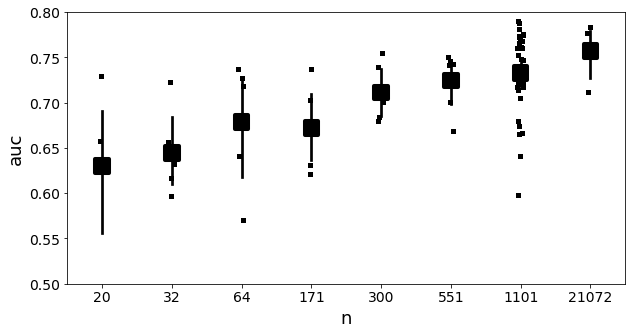

In [82]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 
f, axs = plt.subplots(1, 1, figsize=(10, 5))
sns.pointplot(data=bdd_concat, x=bdd_concat.n, y="auc", palette=['black'], markers='s', linestyles=['-'], scale=2,ax=axs)
sns.stripplot(data=bdd_concat, x=bdd_concat.n, y="auc", marker='s', palette=['black'], jitter=.05, ax=axs)
axs.legend([],[], frameon=False)
axs.set_ylim([0.5,0.8])

In [24]:
bdd_n2 = bdd_n_site.copy(deep=True)
bdd_n2["n"] = bdd_n2.model_name.apply(lambda x: int((x.split(sep='=')[-1])))
bdd_n2 = bdd_n2[bdd_n2["n"]<=551]
bdd_n2.head()

,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,model,n_max,with_labels,train_val_csv_file,exclude,model_name,n
12,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.496505,0.035252,0.551228,0.010062,cingulate_HCP_half_2,SimCLR_supervised,1080,True,/neurospin/dico/data/deep_folding/papers/ipmi2...,False,training-on-hcp-2-n=20,20
32,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.570375,0.015530,0.588257,0.012994,cingulate_HCP_half_2,SimCLR_supervised,1080,True,/neurospin/dico/data/deep_folding/papers/ipmi2...,False,training-on-hcp-2-n=64,64
23,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.596417,0.045014,0.584515,0.010981,cingulate_HCP_half_2,SimCLR_supervised,1080,True,/neurospin/dico/data/deep_folding/papers/ipmi2...,False,training-on-hcp-2-n=32,32
20,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.616425,0.007069,0.616936,0.010266,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=32,32
6,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.620586,0.010187,0.625216,0.013397,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=171,171


In [25]:
bdd_n2[bdd_n2.n == 20]

,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,model,n_max,with_labels,train_val_csv_file,exclude,model_name,n
12,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.496505,0.035252,0.551228,0.010062,cingulate_HCP_half_2,SimCLR_supervised,1080,True,/neurospin/dico/data/deep_folding/papers/ipmi2...,False,training-on-hcp-2-n=20,20
14,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.633726,0.004560,0.588608,0.010724,cingulate_HCP_half_2,SimCLR_supervised,1080,True,/neurospin/dico/data/deep_folding/papers/ipmi2...,False,training-on-hcp-2-n=20,20
13,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.634763,0.002100,0.592327,0.007372,cingulate_HCP_half_2,SimCLR_supervised,1080,True,/neurospin/dico/data/deep_folding/papers/ipmi2...,False,training-on-hcp-2-n=20,20
11,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.657107,0.005040,0.662830,0.007252,cingulate_HCP_half_2,SimCLR_supervised,1080,True,/neurospin/dico/data/deep_folding/papers/ipmi2...,False,training-on-hcp-2-n=20,20
10,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.728256,0.004685,0.707579,0.012732,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=20,20


In [26]:
bdd_n2.rename(columns={"n": "training set size"}, inplace=True)

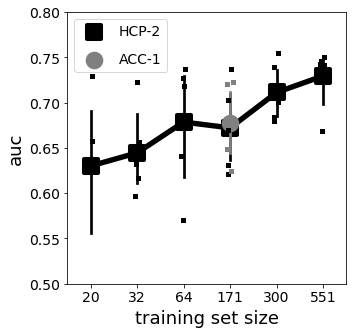

In [27]:
def plotting_against_n(bdd, ax, label_axes=True):
    sns.pointplot(data=bdd, x=bdd["training set size"], y="auc", palette=['black', 'grey'], hue='dataset_name', markers=['s', 'o'], linestyles=['-', '--'], scale=2,ax=ax)
    sns.stripplot(data=bdd[bdd.dataset_name=="cingulate_HCP_half_2"], x=bdd["training set size"], y="auc", marker='s', palette=['black'], jitter=.05, ax=ax)
    sns.stripplot(data=bdd[bdd.dataset_name=="cingulate_ACCpatterns_0"], x=bdd["training set size"], y="auc", marker='s', palette=['grey'], jitter=.1, ax=ax)
    handles, _ = ax.get_legend_handles_labels()
    ax.legend([handles[0], handles[1]], ["HCP-2", "ACC-1"], fontsize=14, labelspacing=1.)
    ax.set_ylim([0.5,0.8])
    if not label_axes:
        ax.set_ylabel("")
        ax.set_yticks([])

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 
f, ax = plt.subplots(1, 1, figsize=(5, 5))

plotting_against_n(bdd=bdd_n2, ax=ax)

In [28]:
bdd_n2[bdd_n2.dataset_name=="cingulate_ACCpatterns_0"].auc

0    0.624013
4    0.648125
2    0.676315
1    0.719590
3    0.721941
Name: auc, dtype: float64

In [29]:
bdd_n2[(bdd_n2.dataset_name=="cingulate_HCP_half_2") & (bdd_n2["training set size"]==171)].auc

6    0.620586
7    0.631104
8    0.669738
9    0.702277
5    0.736871
Name: auc, dtype: float64

In [30]:
from scipy import stats
stats.ttest_ind(bdd_n2[bdd_n2.dataset_name=="cingulate_ACCpatterns_0"].auc, bdd_n2[(bdd_n2.dataset_name=="cingulate_HCP_half_2") & (bdd_n2["training set size"]==171)].auc)

Ttest_indResult(statistic=0.20224396343788223, pvalue=0.8447744593177072)

In [31]:
bdd_n2.model_name[:7]

12     training-on-hcp-2-n=20
32     training-on-hcp-2-n=64
23     training-on-hcp-2-n=32
20     training-on-hcp-2-n=32
6     training-on-hcp-2-n=171
0            convnet-10-n=171
7     training-on-hcp-2-n=171
Name: model_name, dtype: object

In [32]:
bdd_site = bdd_n_site[(bdd_n_site.model_name == "training-on-hcp-2-n=171") | (bdd_n_site.model_name == "convnet-10-n=171")].copy(deep=True)

In [33]:
bdd_site["training_set"] = bdd_site.model_name.apply(lambda x: "HCP-2" if x=="training-on-hcp-2-n=171" else "ACC-1")
bdd_site

,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,model,n_max,with_labels,train_val_csv_file,exclude,model_name,training_set
6,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.620586,0.010187,0.625216,0.013397,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=171,HCP-2
0,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.624013,0.007769,0.614363,0.013166,cingulate_ACCpatterns_0,SimCLR,1099,False,NaN,False,convnet-10-n=171,ACC-1
7,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.631104,0.008945,0.637123,0.014007,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=171,HCP-2
4,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.648125,0.007328,0.617287,0.015699,cingulate_ACCpatterns_0,SimCLR,1099,False,NaN,False,convnet-10-n=171,ACC-1
8,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.669738,0.007033,0.636632,0.007465,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=171,HCP-2
2,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.676315,0.004879,0.658713,0.008576,cingulate_ACCpatterns_0,SimCLR,1099,False,NaN,False,convnet-10-n=171,ACC-1
9,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.702277,0.003577,0.643345,0.009537,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=171,HCP-2
1,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.719590,0.003066,0.658526,0.008749,cingulate_ACCpatterns_0,SimCLR,1099,False,NaN,False,convnet-10-n=171,ACC-1
3,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.721941,0.003999,0.680070,0.005891,cingulate_ACCpatterns_0,SimCLR,1099,False,NaN,False,convnet-10-n=171,ACC-1
5,/neurospin/dico/data/deep_folding/papers/ipmi2...,0.736871,0.003264,0.680865,0.009438,cingulate_HCP_half_2,SimCLR,1080,False,NaN,False,training-on-hcp-2-n=171,HCP-2


In [34]:
bdd_site.rename(columns={"training_set": "training set"}, inplace=True)

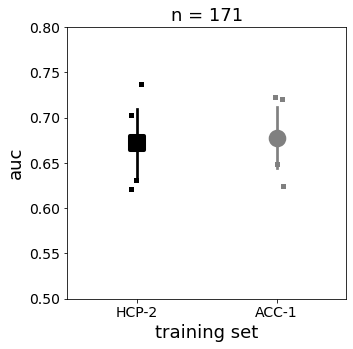

In [35]:
def plotting_against_site(bdd, ax, label_axes=True):
    ax.set_title("n = 171", fontsize=18)
    sns.pointplot(data=bdd, x=bdd["training set"], y="auc", hue="training set", palette=['black', 'grey'], markers=['s', 'o'], linestyles=['-', '-'], scale=2,ax=ax)
    sns.stripplot(data=bdd, x=bdd["training set"], y="auc", marker='s', palette=['black', 'grey'], jitter=.05, ax=ax)
    ax.legend([],[], frameon=False)
    ax.set_ylim([0.5,0.8])
    if not label_axes:
        ax.set(ylabel=None)

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 
f, ax = plt.subplots(1, 1, figsize=(5, 5))

plotting_against_site(bdd=bdd_site, ax=ax)

## Variation with batch size

In [36]:
batch_bdd = pd.read_csv("/neurospin/dico/data/deep_folding/papers/ipmi2023/models/contrastive/summary/bdd_batch-size_training-HCP-half-2_evaluation-ACCpatterns-1.csv")

In [37]:
batch_bdd.rename(columns={"batch_size": "batch size"}, inplace=True)

In [38]:
batch_bdd.head()

,batch size,path,auc,auc_std,accuracy,accuracy_std
0,16,16_2,0.745901,0.003135,0.699181,0.006776
1,4,17-42-14_4,0.630264,0.006329,0.626246,0.012982
2,4,17-42-14_3,0.670654,0.008074,0.654292,0.008544
3,64,23-59-54_2,0.738462,0.003204,0.712070,0.007993
4,2,15-54-55_2,0.479448,0.045682,0.564889,0.016408


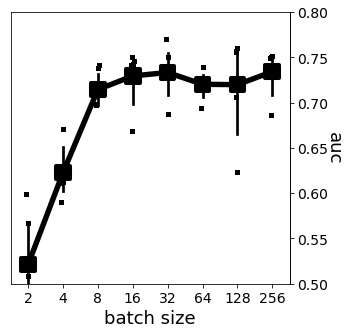

In [39]:
def plotting_against_batch_size(bdd, ax, label_axes=True):
    sns.pointplot(data=bdd, x=bdd["batch size"], markers='s', color='black', y="auc", scale=2,ax=ax)
    sns.stripplot(data=bdd, x=bdd["batch size"], y="auc", marker='s', color='black', jitter=.05, ax=ax)
    ax.set_ylim([0.5,0.8])
    if not label_axes:
        ax.set(ylabel=None)
    ax.set_ylabel("")
    ax.set_yticks([])
    secax = ax.secondary_yaxis('right')
    secax.set_ylabel('auc', rotation=270, labelpad=15)

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 
f, ax = plt.subplots(1, 1, figsize=(5, 5))
plotting_against_batch_size(bdd=batch_bdd, ax=ax)

## Summary

NameError: name 'plotting_SimCLR_betaVAE' is not defined

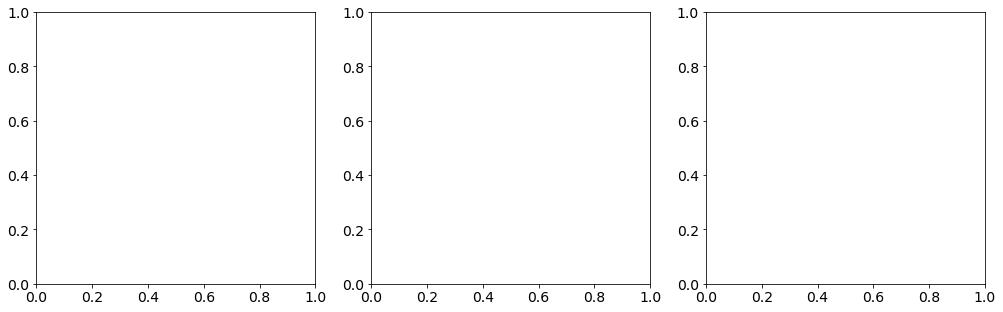

In [40]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 
f, axs = plt.subplots(1,3, figsize=(17, 5))

plotting_SimCLR_betaVAE(bdd=res_bdd, ax=axs[0])
plotting_against_n(bdd=bdd_n2, ax=axs[1], label_axes=False)
# plotting_against_site(bdd=bdd_site, ax=axs[2], label_axes=False)
plotting_against_batch_size(bdd=batch_bdd, ax=axs[2], label_axes=False)

In [ ]:
f.savefig(save_fig_path + "/testing.png")